In [1]:
#data loading
import pandas as pd
filename="/content/STAR.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames  gender ethnicity    birth         star1  readk  read1  read2  \
0          1122  female      afam  1979 Q3           NaN    NaN    NaN    NaN   
1          1137  female      cauc  1980 Q1         small  447.0  507.0  568.0   
2          1143  female      afam  1979 Q4         small  450.0  579.0  588.0   
3          1160    male      cauc  1979 Q4           NaN    NaN    NaN    NaN   
4          1183    male      afam  1980 Q1           NaN  439.0    NaN    NaN   
...         ...     ...       ...      ...           ...    ...    ...    ...   
11593    186650    male      cauc  1979 Q3         small  483.0  590.0  650.0   
11594    186665  female      cauc  1980 Q3       regular  437.0  533.0  586.0   
11595    186687    male      cauc  1980 Q1       regular    NaN  571.0  604.0   
11596    186705  female      afam  1980 Q1  regular+aide  431.0  475.0  542.0   
11597    186718    male      afam  1980 Q2  regular+aide  421.0  468.0  571.0   

       read3  mathk  math1 

In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
gender,20
ethnicity,145
birth,70
star1,4769
readk,5809
read1,5202
read2,5521
read3,5598
mathk,5727


In [6]:

stringColumns={1,2,3,4}
for x in stringColumns:
    a[a.columns[x]]=a[a.columns[x]].fillna("0")

intColumns={5,6,7,8,9,10,11,12,13}
for y in intColumns:
    a[a.columns[y]]=a[a.columns[y]].fillna(0)

In [10]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="star1"

#transform string into int
transformColumns={1,2,3,4}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames  gender  ethnicity  birth  star1  readk  read1  read2  read3  \
0          1122       1          1     11      0    0.0    0.0    0.0     42   
1          1137       1          4     13      3  447.0  507.0  568.0     46   
2          1143       1          1     12      3  450.0  579.0  588.0     74   
3          1160       2          4     12      0    0.0    0.0    0.0     84   
4          1183       2          1     13      0  439.0    0.0    0.0      0   
...         ...     ...        ...    ...    ...    ...    ...    ...    ...   
11593    186650       2          4     11      3  483.0  590.0  650.0     82   
11594    186665       1          4     15      1  437.0  533.0  586.0     77   
11595    186687       2          4     13      1    0.0  571.0  604.0     51   
11596    186705       1          1     13      2  431.0  475.0  542.0     66   
11597    186718       2          1     14      2  421.0  468.0  571.0     42   

       mathk  math1  math2  math3  scho

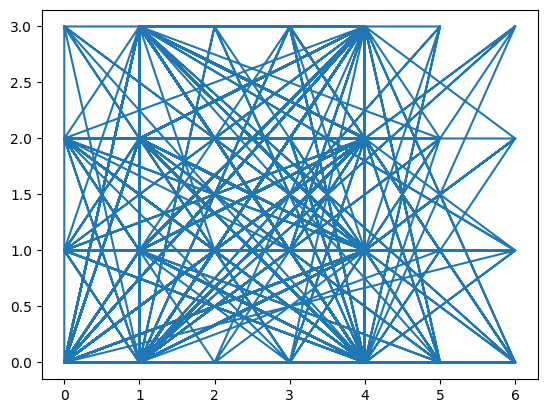

In [11]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 11598 artists>

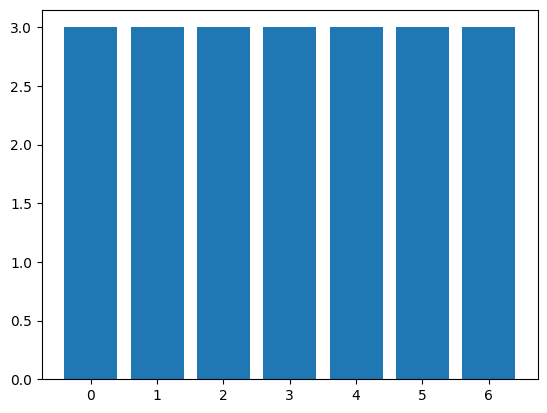

In [12]:
plt.bar(a[a.columns[2]],a[str(target)])

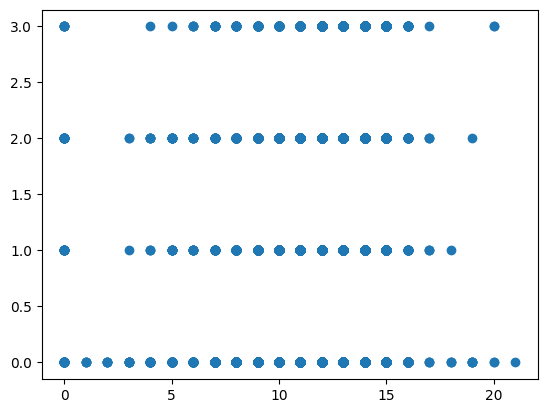

In [13]:
plt.scatter(a[a.columns[3]], a[str(target)])

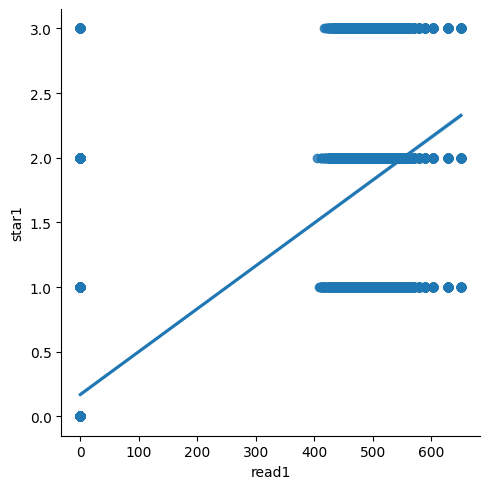

In [15]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="read1",y="star1",data=a)

<Axes: xlabel='star1', ylabel='star1'>

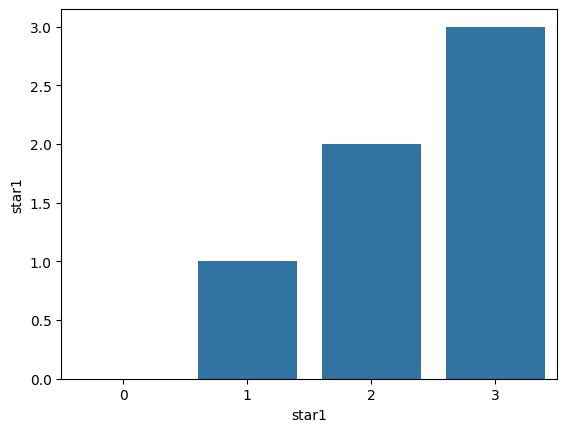

In [16]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='math1', ylabel='star1'>

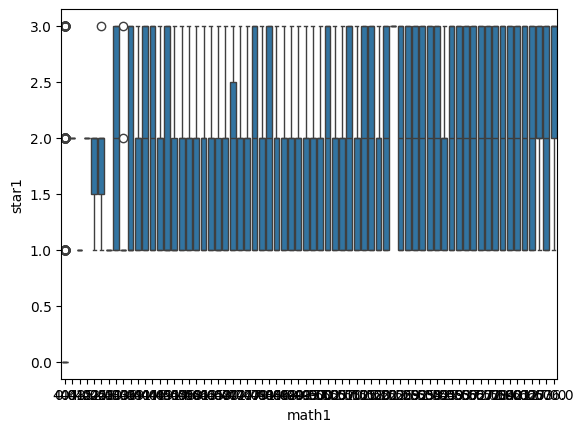

In [17]:
sns.boxplot(x=a.columns[10],y=str(target),data=a)

<ipython-input-18-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='star1', ylabel='Density'>

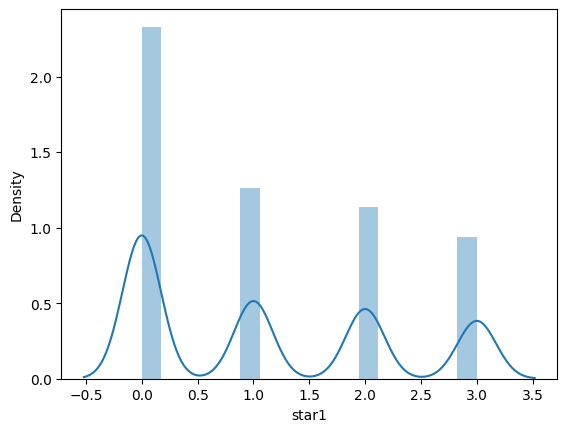

In [18]:
sns.distplot(a[str(target)])

<Axes: xlabel='birth', ylabel='Density'>

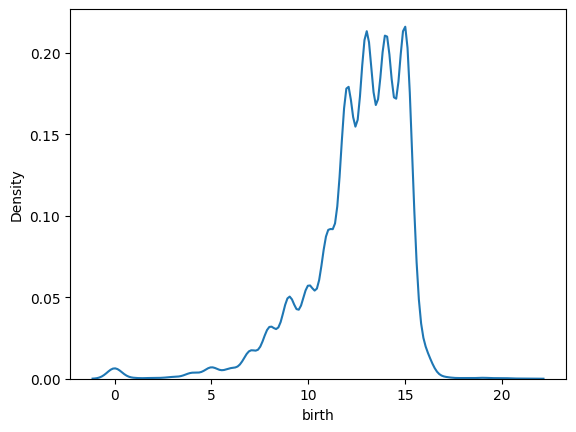

In [19]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='ethnicity', ylabel='count'>

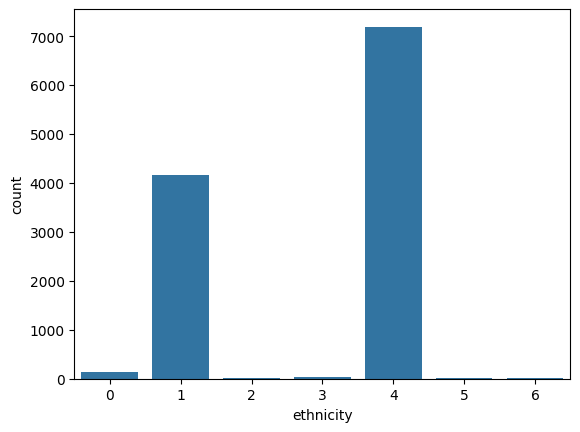

In [20]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

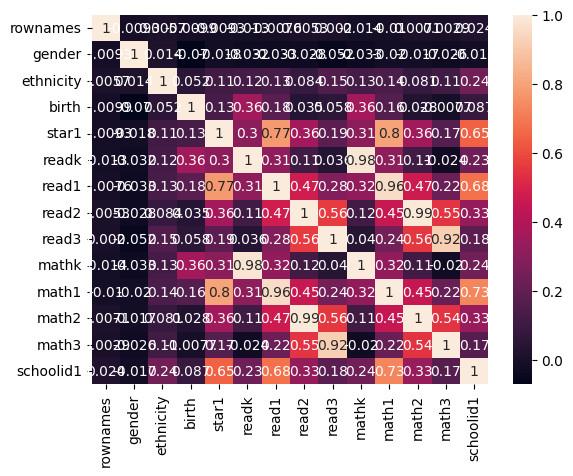

In [21]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

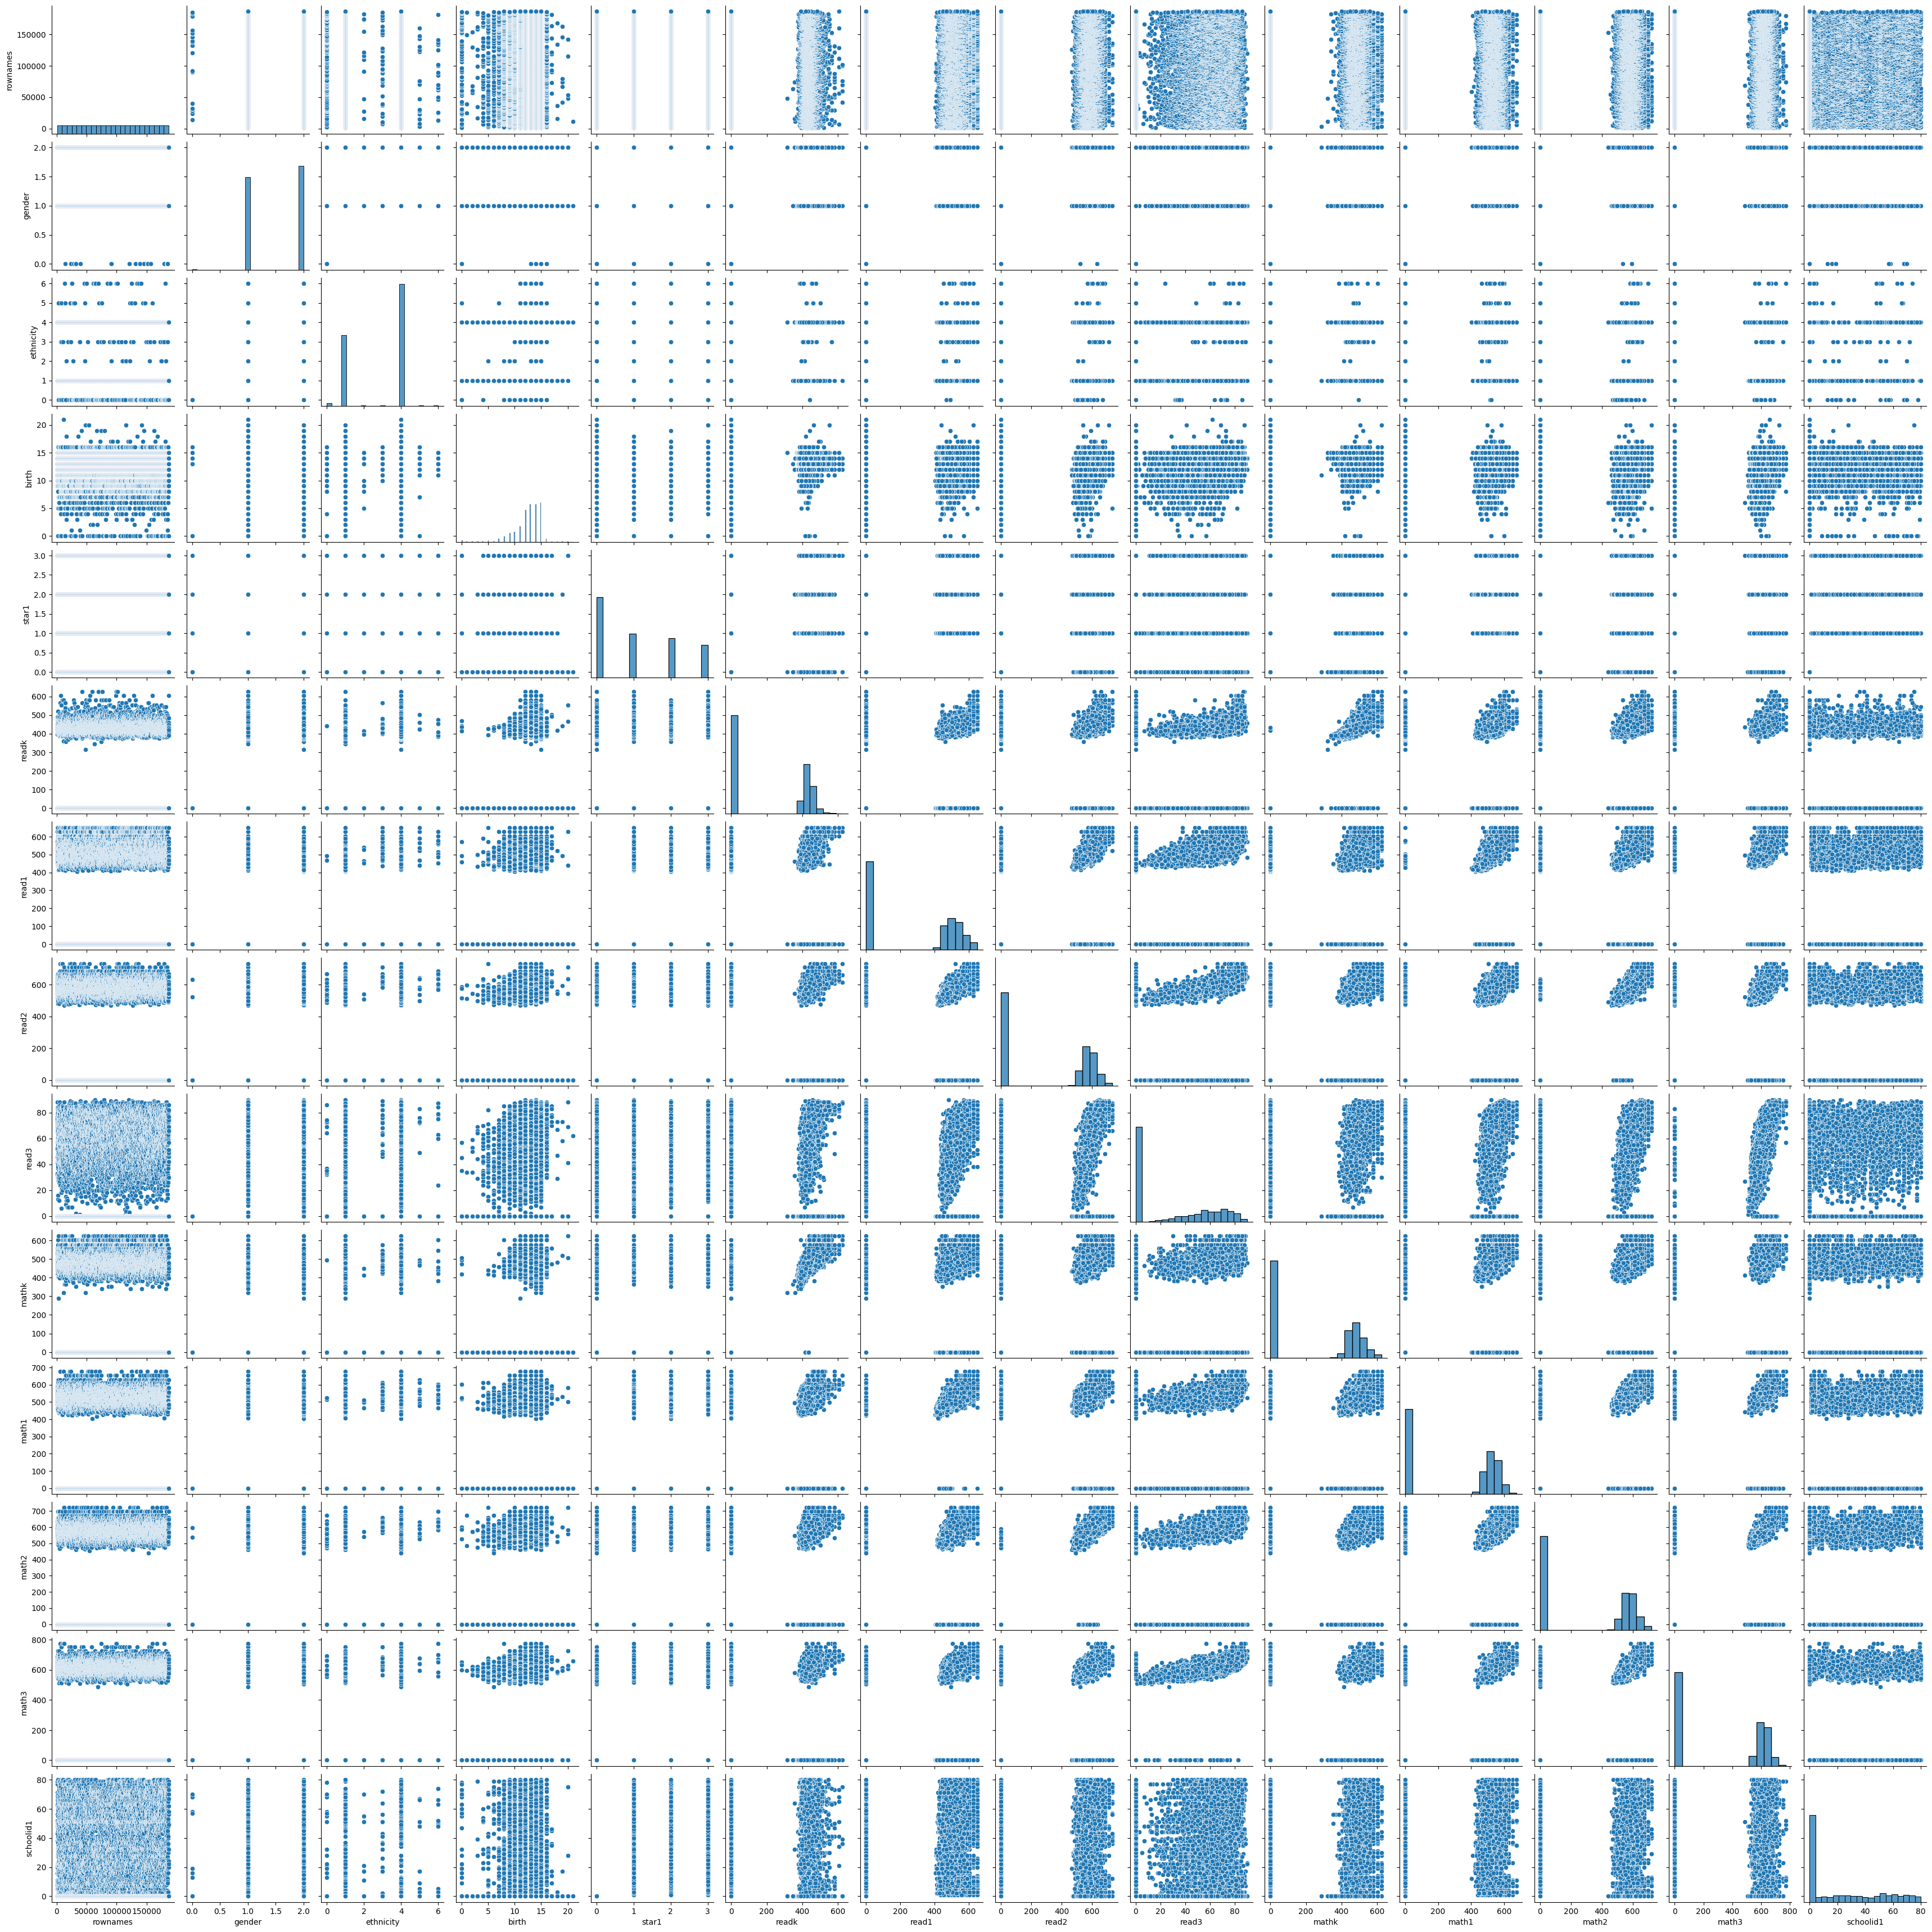

In [22]:
sns.pairplot(data=a)

In [23]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  gender  ethnicity  birth  readk  read1  read2  read3  mathk  \
0          1122       1          1     11    0.0    0.0    0.0     42    0.0   
1          1137       1          4     13  447.0  507.0  568.0     46  473.0   
2          1143       1          1     12  450.0  579.0  588.0     74  536.0   
3          1160       2          4     12    0.0    0.0    0.0     84    0.0   
4          1183       2          1     13  439.0    0.0    0.0      0  463.0   
...         ...     ...        ...    ...    ...    ...    ...    ...    ...   
11593    186650       2          4     11  483.0  590.0  650.0     82  559.0   
11594    186665       1          4     15  437.0  533.0  586.0     77  513.0   
11595    186687       2          4     13    0.0  571.0  604.0     51    0.0   
11596    186705       1          1     13  431.0  475.0  542.0     66  478.0   
11597    186718       2          1     14  421.0  468.0  571.0     42  449.0   

       math1  math2  math3  schoolid1  

In [24]:
print(y)

0        0
1        3
2        3
3        0
4        0
        ..
11593    3
11594    1
11595    1
11596    2
11597    2
Name: star1, Length: 11598, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
print(x_train)

       rownames  gender  ethnicity  birth  readk  read1  read2  read3  mathk  \
10900    175562       1          4     15    0.0    0.0    0.0     28    0.0   
4697      76286       1          4     14    0.0    0.0    0.0      0    0.0   
8055     130025       1          1     15    0.0    0.0  582.0     77    0.0   
2673      43888       2          1      9    0.0    0.0  584.0     64    0.0   
8666     139801       2          0     15    0.0    0.0    0.0      0    0.0   
...         ...     ...        ...    ...    ...    ...    ...    ...    ...   
1792      29791       2          4     13  448.0    0.0    0.0      0  473.0   
2959      48457       2          4     15  470.0    0.0    0.0      0  473.0   
10155    163638       1          4     12  437.0  519.0    0.0      0  559.0   
3382      55232       1          4     13  413.0    0.0    0.0      0  459.0   
2458      40445       1          1     14  413.0  519.0  564.0     67  459.0   

       math1  math2  math3  schoolid1  

In [27]:
print(y_train)

10900    0
4697     0
8055     0
2673     0
8666     0
        ..
1792     0
2959     0
10155    1
3382     0
2458     3
Name: star1, Length: 9278, dtype: int64


In [28]:
print(x_test)

       rownames  gender  ethnicity  birth  readk  read1  read2  read3  mathk  \
4548      73898       1          4     15    0.0    0.0    0.0     62    0.0   
6296     101879       2          4     12    0.0  442.0    0.0      0    0.0   
10804    174028       2          4     14  468.0    0.0  596.0      0  536.0   
1932      32031       2          4     13  422.0    0.0    0.0      0  559.0   
10754    173231       1          4     13  403.0  465.0    0.0      0  454.0   
...         ...     ...        ...    ...    ...    ...    ...    ...    ...   
10325    166362       2          4     15  397.0    0.0    0.0      0  423.0   
2504      41178       1          4     15  413.0    0.0    0.0      0  459.0   
5224      84736       2          4     13  425.0    0.0    0.0      0  478.0   
3350      54716       2          4     10    0.0  497.0  579.0     30    0.0   
5240      84992       1          1     13    0.0  463.0    0.0      0    0.0   

       math1  math2  math3  schoolid1  

In [29]:
print(y_test)

4548     0
6296     2
10804    0
1932     2
10754    2
        ..
10325    0
2504     0
5224     0
3350     2
5240     2
Name: star1, Length: 2320, dtype: int64


In [30]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [31]:
print(ypred)

[-0.00456452  1.4560579   0.09316159 ...  0.14098543  1.68583546
  1.78619869]


In [33]:
print(model.predict([[73898,1,4,15,0.0,0.0,0.0,62,0.0,0.0,0.0,651.0,0.0]]))

[-0.00456452]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [35]:
print(ypred)

[0. 1. 0. ... 0. 3. 2.]


In [36]:
print(model.predict([[73898,1,4,15,0.0,0.0,0.0,62,0.0,0.0,0.0,651.0,0.0]]))

[-0.00456452]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [38]:
print(ypred)

[0.   1.57 0.   ... 0.   1.49 1.64]


In [39]:
print(model.predict([[73898,1,4,15,0.0,0.0,0.0,62,0.0,0.0,0.0,651.0,0.0]]))

[-0.00456452]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
